# Análise exploratória de dados

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Descrição dos dados

In [17]:
diamonds = pd.read_csv('../data/raw/data.csv')
print("\nPrimeiras linhas do conjunto de dados:")
diamonds.head()


Primeiras linhas do conjunto de dados:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Obtendo informações gerais sobre o DataFrame:

In [11]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Estatísticas descritivas:

In [12]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Valores únicos presentes nas colunas categóricas:

In [16]:
print("\nValores únicos para as colunas 'cut', 'color' e 'clarity':")
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())


Valores únicos para as colunas 'cut', 'color' e 'clarity':
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Quantidade de valores faltantes:

In [18]:
print("\nQuantidade de valores faltantes por variável:")
print(diamonds.isnull().sum())


Quantidade de valores faltantes por variável:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### Tipos de variáveis:

In [20]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### Dicionário de dados:

In [26]:
dictionary = pd.read_csv('../data/external/dictionary.csv')
dictionary

,variavel,descricao,tipo,subtipo
0,carat,Peso do diamante (0.2--5.01),quantitativa,contínua
1,cut,"Qualidade do corte (Fair, Good, Very Good, Pre...",qualitativa,ordinal
2,color,"Cor do diamante, de D (melhor) a J (pior)",qualitativa,ordinal
3,clarity,"Medida de quão claro é o diamante (I1 (pior), ...",qualitativa,ordinal
4,depth,Percentual de profundidade total = z / média(x...,quantitativa,contínua
5,table,Largura do topo do diamante em relação ao pont...,quantitativa,contínua
6,price,"Preço em dólares americanos (US$326--US$18,823)",quantitativa,contínua
7,x,Comprimento em mm (0--10.74),quantitativa,contínua
8,y,Largura em mm (0--58.9),quantitativa,contínua
9,z,Profundidade em mm (0--31.8),quantitativa,contínua


## 2. Perguntas de partida e hipóteses

### - Qual é a relação entre o peso (carat) e o preço dos diamantes?
  - **Hipótese**: Diamantes com maior peso (carat) tendem a ter um preço mais elevado.
  
### - Como a qualidade do corte (cut) afeta o preço dos diamantes?
-   **Hipótese:** Diamantes com cortes de qualidade superior (Ideal, Premium) têm preços mais altos.

### - Existe uma correlação entre a cor do diamante e seu preço?
-   **Hipótese:** Diamantes com cores melhores (próximas a D) são mais caros.

### - Como a clareza (clarity) influencia o preço dos diamantes?
-   **Hipótese:** Diamantes com maior clareza (mais próximos de IF) são mais caros

### - Qual é a distribuição das diferentes qualidades de corte (cut) entre os diamantes?
-   **Hipótese:** A maioria dos diamantes possui cortes de qualidade média a boa (Good, Very Good).

### Pergunta 1: Relação entre o peso (carat) e o preço dos diamantes:

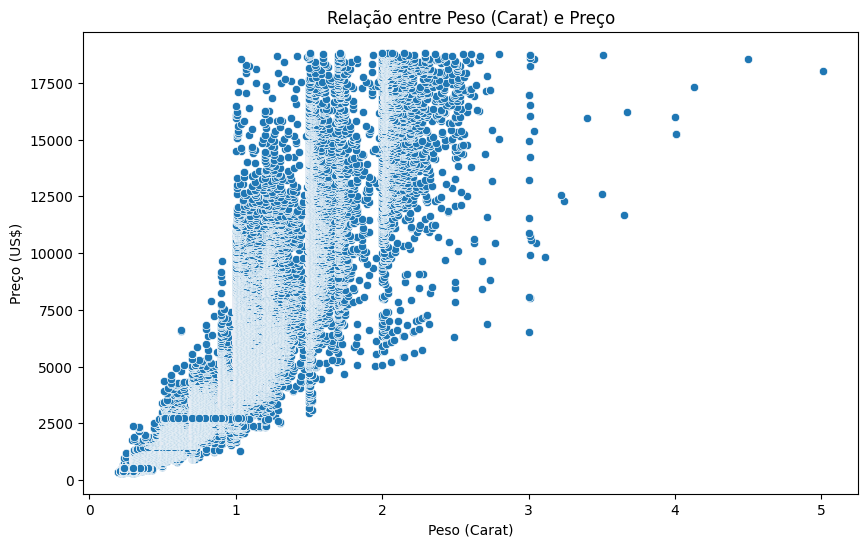

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=diamonds)
plt.title('Relação entre Peso (Carat) e Preço')
plt.xlabel('Peso (Carat)')
plt.ylabel('Preço (US$)')
plt.show()

Há uma correlação positiva evidente entre o peso do diamante (carat) e o preço. À medida que o peso das pedras de diamante aumentam, o preço tende a aumentar. Isso confirma a hipótese de que diamantes mais pesados são mais caros. No entanto, para uma análise mais detalhada, é necessário considerar outros fatores que podem influenciar o preço, como a qualidade do corte, a cor e a clareza, e ver como eles interagem com o peso e o preço dos diamantes.

### Pergunta 2: Qualidade do corte (cut) e o preço dos diamantes:

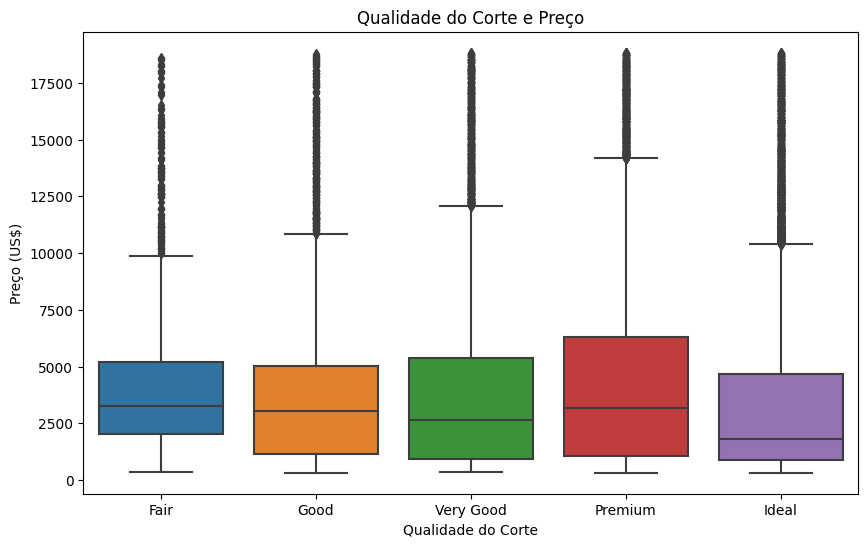

In [28]:
# Definir a ordem das categorias de 'cut' para criar o boxplot ordenado do pior para o melhor
ordem_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=ordem_cut, ordered=True)


plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Qualidade do Corte e Preço')
plt.xlabel('Qualidade do Corte')
plt.ylabel('Preço (US$)')
plt.show()

#### Ao analisar o gráfico é possível deduzir as seguintes observações:
- As medianas dos preços são bastante próximas entre si para as diferentes qualidades de corte (Fair, Good, Very Good, Premium, Ideal). No entanto, a mediana é ligeiramente maior para cortes de qualidade Premium e Ideal em comparação com Fair e Good.
- Há muitos outliers em todas as categorias de corte, o que indica que existem diamantes com preços excepcionalmente altos em cada categoria.
- Embora a mediana dos preços seja um pouco mais alta para os cortes Premium e Ideal, a diferença não é tão alta. O que pode significar que a qualidade do corte pode não ser o único fator determinante para o preço dos diamantes.

### Pergunta 3: Cor do diamante e seu preço:

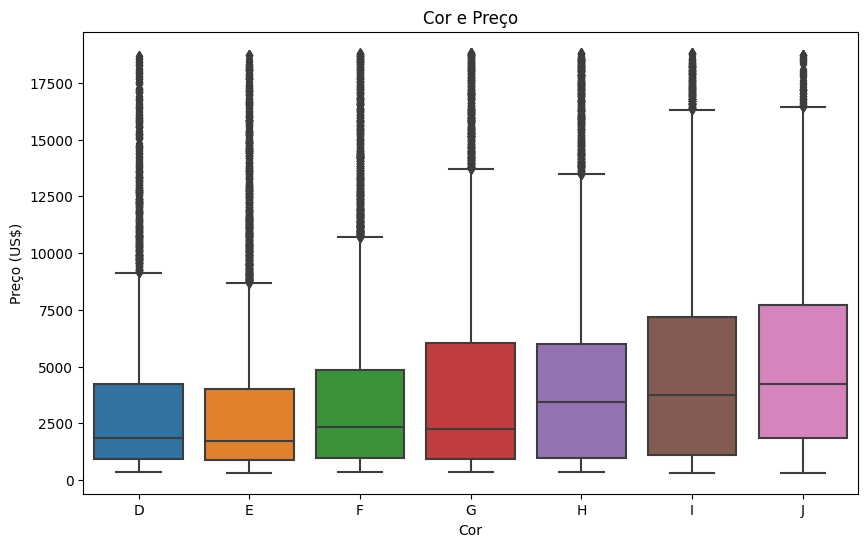

In [30]:
# Definir a ordem das categorias de 'color' para criar o boxplot ordenado do melhor para o pior
ordem_color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
diamonds['color'] = pd.Categorical(diamonds['color'], categories=ordem_color, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=diamonds)
plt.title('Cor e Preço')
plt.xlabel('Cor')
plt.ylabel('Preço (US$)')
plt.show()

#### Ao analisar o boxplot que mostra a relação entre a cor dos diamantes (variável color) e o preço, podemos fazer as seguintes observações:
- Não há uma tendência clara de que cores mais próximas de D sejam significativamente mais caras. As medianas dos preços não aumentam consistentemente à medida que a cor piora (de D a J).
- Esperava-se que diamantes com cores mais próximas de D (melhor cor) tivessem preços mais altos, mas o gráfico não mostra claramente essa expectativa. A mediana do preço dos diamantes com cor J (pior cor), por exemplo, é maior do que a de diamantes com cor D.
- Embora a cor seja um fator importante na avaliação de um diamante, este gráfico sugere que ela não é o único fator determinante do preço. Outros atributos devem ser considerados para uma análise mais abrangente.

### Pergunta 4: Clareza (clarity) e o preço dos diamantes:

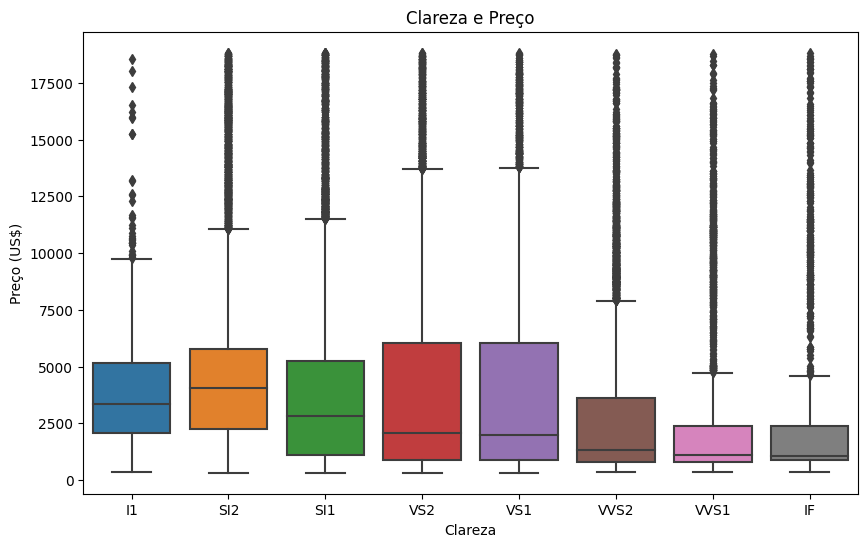

In [31]:
# Definir a ordem das categorias de 'clarity' para criar o boxplot ordenado do pior para o melhor
ordem_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], categories=ordem_clarity, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=diamonds)
plt.title('Clareza e Preço')
plt.xlabel('Clareza')
plt.ylabel('Preço (US$)')
plt.show()

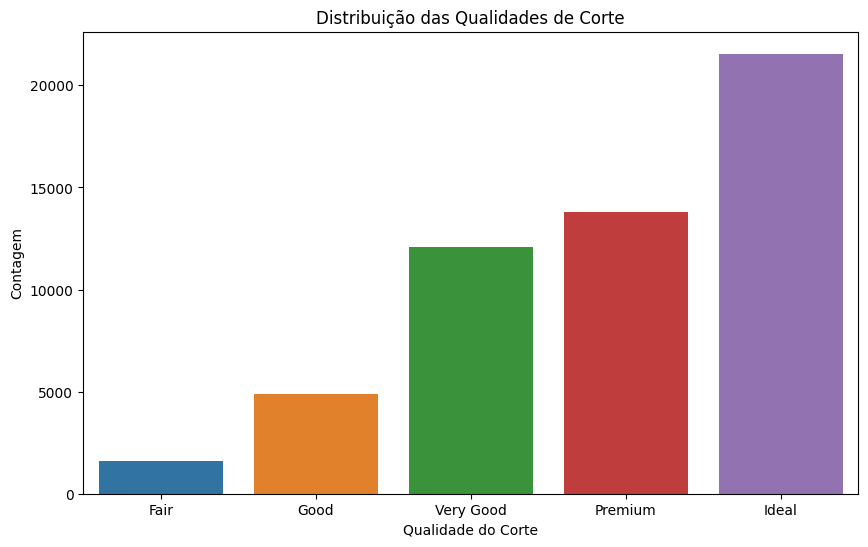

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cut', data=diamonds)
plt.title('Distribuição das Qualidades de Corte')
plt.xlabel('Qualidade do Corte')
plt.ylabel('Contagem')
plt.show()

## 3. Insights